# What is t-SNE?
<code> t-SNE (t-distributed Stochastic Neighbor Embedding) is an unsupervised non-linear dimensionality reduction technique for data exploration and visualizing high-dimensional data. Non-linear dimensionality reduction means that the algorithm allows us to separate data that cannot be separated by a straight line. 
</code>
<img src="https://media.licdn.com/dms/image/C5612AQGPjBu4ntDSQg/article-inline_image-shrink_1000_1488/0/1595754430445?e=1686182400&v=beta&t=ruQVCJFZ58LFF9oAbatEI2XOWo4A_D1BOIeY2mOPizw" >

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as pe
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline

In [2]:
#Load dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/t-sne.csv',
                index_col=0)
df

,0,1,2,3,4,5,cluster
0,1.648903,-0.956522,-0.370871,1.632731,0.449885,1.010000,2
1,-2.139453,2.166586,-1.576371,0.292220,-1.500128,-2.094612,0
2,-0.667562,-0.006574,1.025704,1.358282,0.318335,-0.075229,2
3,-0.365512,0.590233,-0.758609,0.862445,-0.806794,-0.544321,0
4,0.089855,0.046093,-0.238569,0.226327,0.141991,-0.028177,0
...,...,...,...,...,...,...,...
1495,-0.787989,-0.014546,1.225825,1.135096,-0.314728,-0.083051,1
1496,-0.271467,0.328860,-0.319962,-0.794812,-0.020802,-0.311487,0
1497,1.609896,-0.399509,-1.550149,-0.715244,-0.536661,0.533344,2
1498,-1.866106,0.553937,1.594878,-1.187990,0.629551,-0.695196,1


<Axes: xlabel='cluster', ylabel='count'>

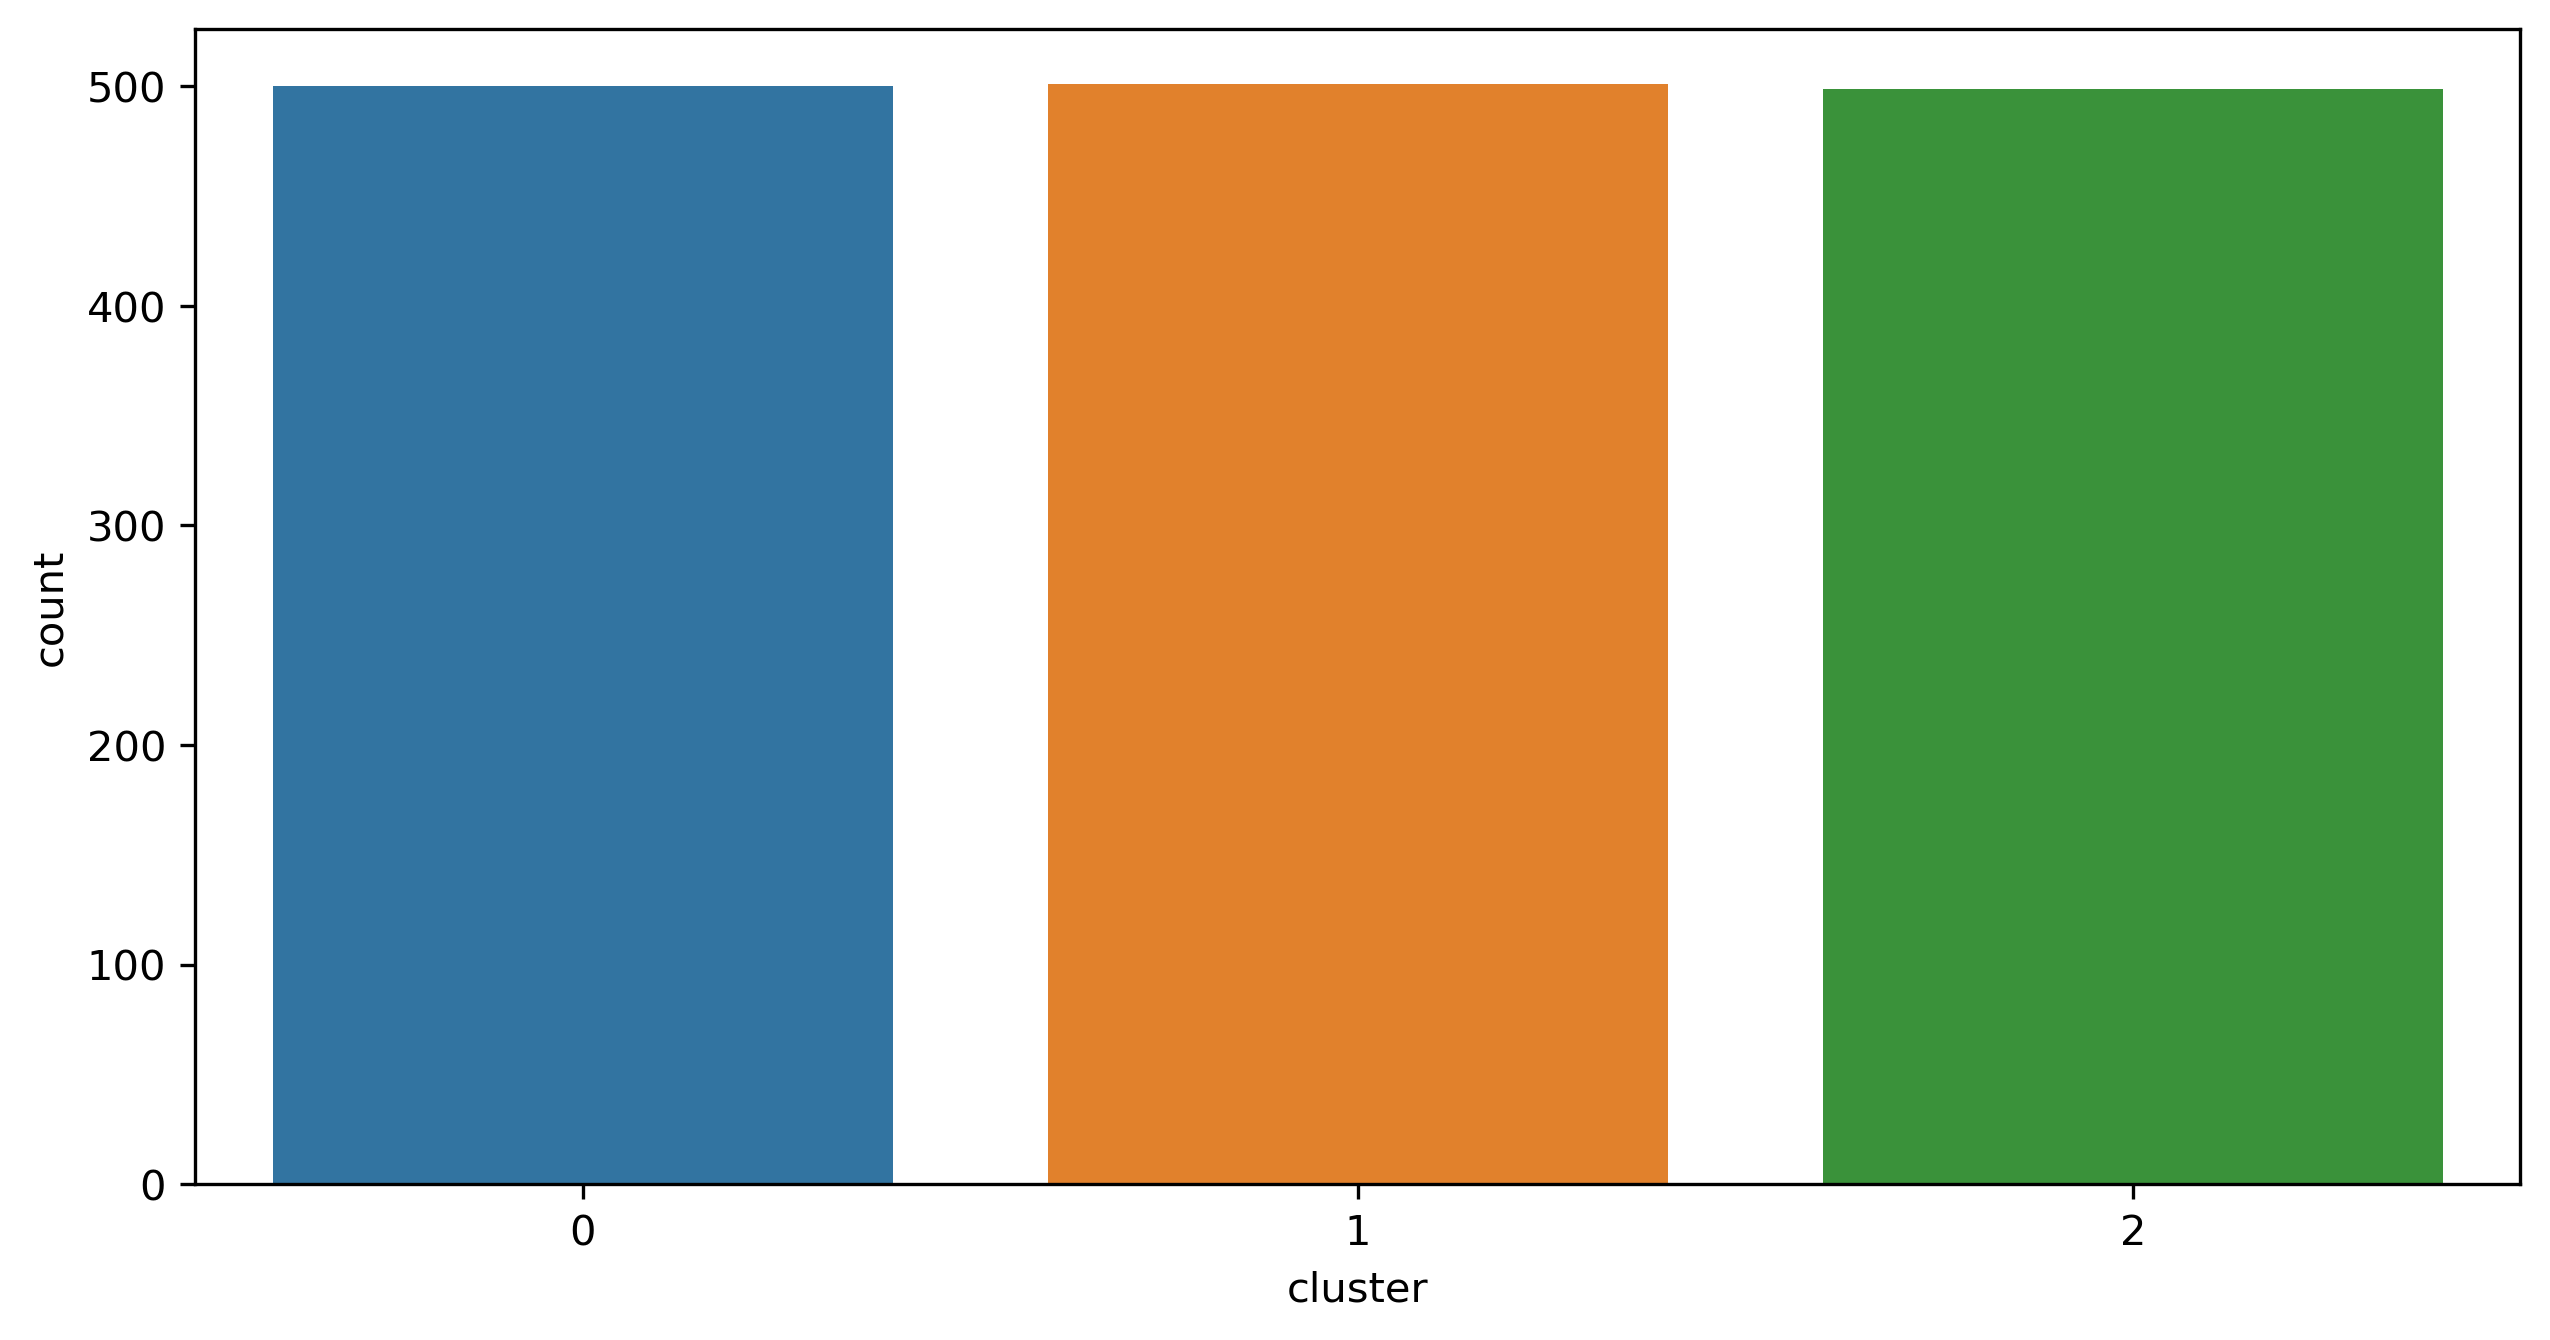

In [4]:
sns.countplot(x =  df['cluster'])

In [ ]:
#PCA plot

In [5]:
x = df.iloc[:,:-1]
y = df['cluster']

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x = sc.fit_transform(x)
x

array([[ 1.43594086, -1.43529795, -0.0266226 ,  1.61211184,  0.43963969,
         1.48172413],
       [-1.33685379,  1.95940515, -0.92405429,  0.28005882, -1.54824771,
        -1.91015005],
       [-0.25953962, -0.40273987,  1.01305547,  1.33939432,  0.30553534,
         0.29608118],
       ...,
       [ 1.40739051, -0.82984529, -0.9045336 , -0.72104898, -0.56606715,
         0.96096464],
       [-1.13678462,  0.20651594,  1.43677572, -1.19081194,  0.62279629,
        -0.38124957],
       [ 0.755825  , -0.39678701, -0.5601874 ,  0.74273321,  0.25117858,
         0.47445629]])

In [7]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(x)
pcs

array([[-2.50801146, -0.25378625],
       [ 3.08508962, -0.85387622],
       [-0.34693272,  1.0760612 ],
       ...,
       [-1.75734188, -1.1406857 ],
       [ 0.86410375,  1.72502656],
       [-0.88864042, -0.70744687]])

In [9]:
y

0       2
1       0
2       2
3       0
4       0
       ..
1495    1
1496    0
1497    2
1498    1
1499    1
Name: cluster, Length: 1500, dtype: int64

In [10]:
pe.scatter(x = pcs[:,0],y=pcs[:,1], color=y)

In [ ]:
#t-SNE plot

In [12]:
tsne = TSNE(n_components=3)
ts = tsne.fit_transform(x)

In [13]:
ts

array([[-11.603231  ,  -0.3412161 ,  -3.051309  ],
       [ 12.289662  ,  -7.9003386 ,  -1.0652659 ],
       [  4.2134066 ,   9.515778  ,  -3.2199268 ],
       ...,
       [ -7.1816297 ,  -5.6489153 ,  -0.47316635],
       [ -2.6747148 ,  10.0299225 ,   3.4158309 ],
       [ -7.2124705 ,  -0.16255625,  -4.1635065 ]], dtype=float32)

In [14]:
pe.scatter(x = ts[:,0],y = ts[:,1], color=y)

In [15]:
pe.scatter_3d(x = ts[:,0],y = ts[:,1],z = ts[:,2], color=y)

# Diabetes Dataset

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [21]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [19]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(x)

In [20]:
pcs

array([[-75.71465491, -35.95078264],
       [-82.3582676 ,  28.90821322],
       [-74.63064344, -67.90649647],
       ...,
       [ 32.11319827,   3.3766648 ],
       [-80.21449431, -14.18601977],
       [-81.30814972,  21.62149606]])

In [22]:
pe.scatter(x = pcs[:,0],y = pcs[:,1], color=y)

In [26]:
tsne = TSNE(n_components=3)

ts = tsne.fit_transform(x)

In [27]:
ts

array([[-10.384786  ,  -6.1761184 ,  -3.611133  ],
       [ -2.7329192 ,  -4.788585  ,  -0.8414573 ],
       [-14.67624   ,  -6.352788  ,  -1.0914975 ],
       ...,
       [  6.480149  ,   4.7117515 ,  -0.13692138],
       [-11.069025  ,  -0.97783625,   2.3379421 ],
       [ -3.1140432 ,  -5.87423   ,  -1.2492377 ]], dtype=float32)

In [28]:
pe.scatter(x = ts[:,0],y = ts[:,1],color=y)

In [29]:
pe.scatter_3d(x = ts[:,0],y = ts[:,1],z = ts[:,2], color = y)